## Exercise 00 : Line chart

### Import and connection

In [1]:
import pandas as pd
import sqlite3

In [2]:
try:
  connect = sqlite3.connect('../data/checking-logs.sqlite')
  print('OK. Connected to sqlite')

except sqlite3.Error as error:
  print('Error with connection:', error)

OK. Connected to sqlite


Получим дату и время из таблицы просмотров страниц, выбирая только пользователей, а не администраторов

In [3]:
query = '''
SELECT *
FROM pageviews
WHERE uid LIKE 'user_%'
'''
df = pd.io.sql.read_sql(query, connect, parse_dates=['datetime'])
df

,index,uid,datetime
0,12,user_30,2020-04-17 22:46:26.785035
1,14,user_14,2020-04-18 10:53:52.623447
2,15,user_17,2020-04-18 10:56:55.833899
3,16,user_14,2020-04-18 10:57:37.331258
4,18,user_17,2020-04-18 12:05:48.200144
...,...,...,...
982,1073,user_28,2020-05-21 18:45:20.441142
983,1074,user_19,2020-05-21 23:03:06.457819
984,1075,user_25,2020-05-21 23:23:49.995349
985,1078,user_5,2020-05-22 11:30:18.368990


Создаим новый фрейм данных, в котором посещения подсчитываются и группируются по дате

https://pythonru.com/biblioteki/struktury-dannyh-v-pandas

In [4]:
df_views = df.groupby(df['datetime'].dt.date).count()['uid']
df_views

datetime
2020-04-17      1
2020-04-18     23
2020-04-19     15
2020-04-21      3
2020-04-22      1
2020-04-23      5
2020-04-25      1
2020-04-26      8
2020-04-28      2
2020-04-29      4
2020-04-30      9
2020-05-01      3
2020-05-02      6
2020-05-03     19
2020-05-04      1
2020-05-05      1
2020-05-06      3
2020-05-07      2
2020-05-08     48
2020-05-09     19
2020-05-10    110
2020-05-11    200
2020-05-12     85
2020-05-13    102
2020-05-14    187
2020-05-15     29
2020-05-16      4
2020-05-17      9
2020-05-18     51
2020-05-19     11
2020-05-20     12
2020-05-21     11
2020-05-22      2
Name: uid, dtype: int64

Построим график по условиям:

◦ размер шрифта должен быть 8

◦ размер фигуры равен (15,8)

◦ график должен иметь количество просмотров заголовка в день

https://pythobyte.com/introduction-to-data-visualization-in-python-with-pandas-9f8fe4ec/

<AxesSubplot: title={'center': 'Views per day'}, xlabel='datetime'>

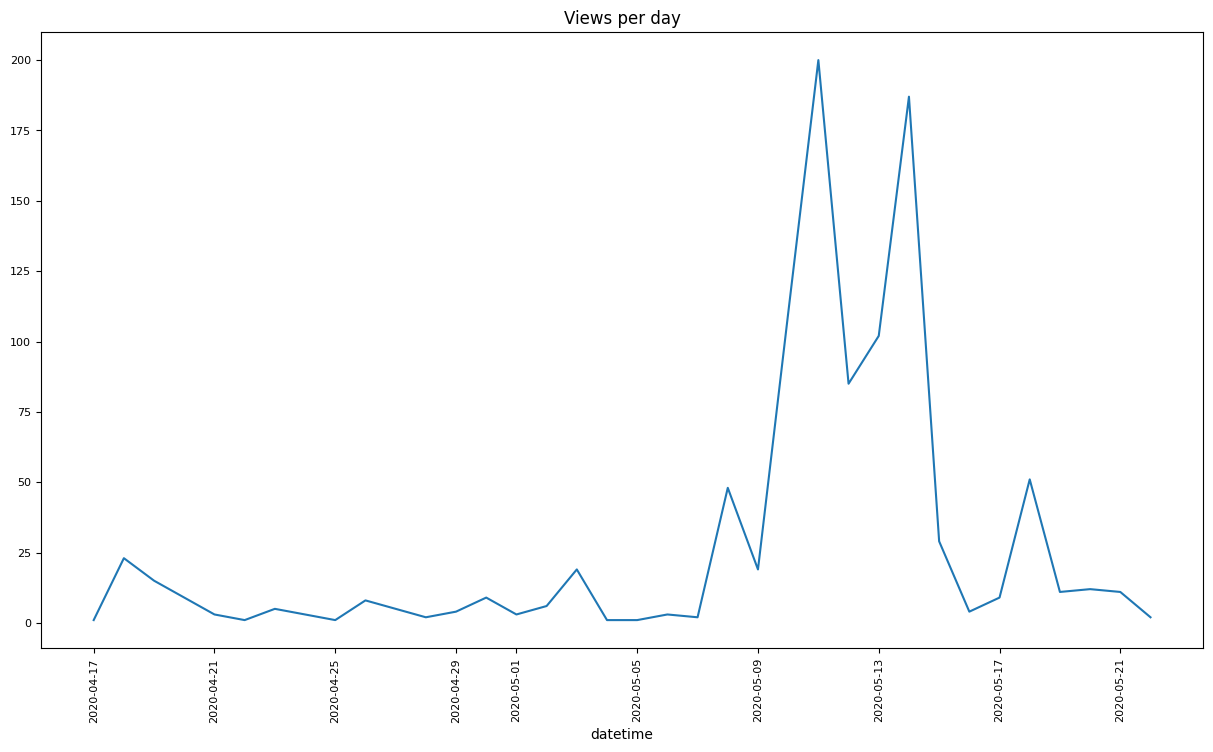

In [7]:
df_views.plot(x='date', y='views', figsize=(15, 8), title='Views per day', rot=90, fontsize=8)

Закроем соединение

In [16]:
connect.close()
print('Connection to SQLite closed')

Connection to SQLite closed
